                                                                                                                                                               import libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings

In [6]:
warnings.filterwarnings("ignore")

In [7]:
#import dataset

In [9]:
diabetes_df = pd.read_csv(r"C:\Users\USER\Desktop\ML\diabetes.csv")

In [10]:
diabetes_df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Family History,Gender,Age(yrs),Result
0,6,148,72,35,0,33.6,0.627,Male,50,1
1,1,85,66,29,0,26.6,0.351,Male,31,0
2,8,183,64,0,0,23.3,0.672,Female,32,1
3,1,89,66,23,94,28.1,0.167,Female,21,0
4,0,137,40,35,168,43.1,2.288,Male,33,1


In [11]:
diabetes_df.shape

(768, 10)

In [12]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnancies     768 non-null    int64  
 1   Glucose         768 non-null    int64  
 2   BP              768 non-null    int64  
 3   SkinThickness   768 non-null    int64  
 4   Insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   Family History  768 non-null    float64
 7   Gender          768 non-null    object 
 8   Age(yrs)        768 non-null    int64  
 9   Result          768 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [13]:
#summary of the dataset

In [14]:
diabetes_df.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Family History,Age(yrs),Result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
diabetes_df_features = diabetes_df[['Pregnancies','Glucose','BP','SkinThickness','Insulin','BMI','Family History',
                                 'Age(yrs)','Gender']]

                Pregnancies   Glucose        BP  SkinThickness   Insulin  \
Pregnancies        1.000000  0.129459  0.141282      -0.081672 -0.073535   
Glucose            0.129459  1.000000  0.152590       0.057328  0.331357   
BP                 0.141282  0.152590  1.000000       0.207371  0.088933   
SkinThickness     -0.081672  0.057328  0.207371       1.000000  0.436783   
Insulin           -0.073535  0.331357  0.088933       0.436783  1.000000   
BMI                0.017683  0.221071  0.281805       0.392573  0.197859   
Family History    -0.033523  0.137337  0.041265       0.183928  0.185071   
Age(yrs)           0.544341  0.263514  0.239528      -0.113970 -0.042163   

                     BMI  Family History  Age(yrs)  
Pregnancies     0.017683       -0.033523  0.544341  
Glucose         0.221071        0.137337  0.263514  
BP              0.281805        0.041265  0.239528  
SkinThickness   0.392573        0.183928 -0.113970  
Insulin         0.197859        0.185071 -0.042163

<AxesSubplot:>

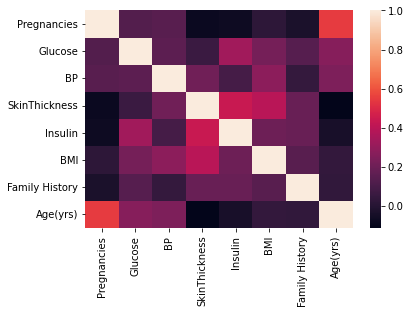

In [16]:
print(diabetes_df_features.corr())
sns.heatmap(diabetes_df_features.corr())

<AxesSubplot:>

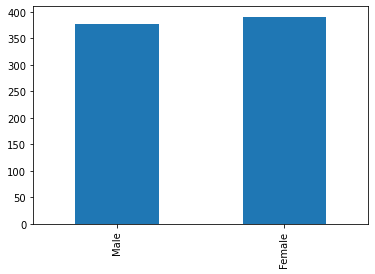

In [17]:
diabetes_df['Gender'].value_counts().sort_index(ascending=False).plot(kind='bar')

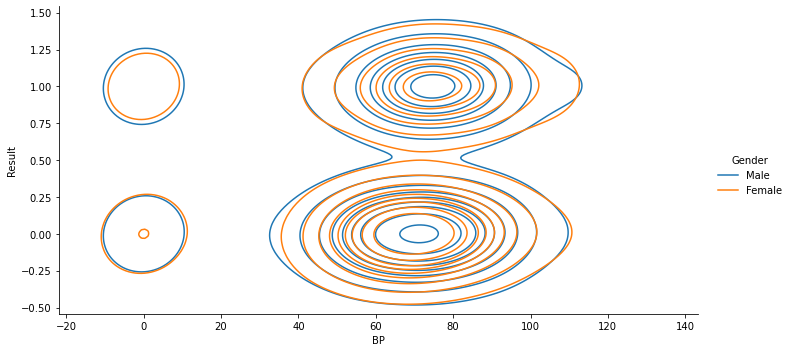

In [18]:
sns.displot(kind='kde', x= 'BP', y='Result',hue='Gender', data =diabetes_df, aspect =2);

<AxesSubplot:xlabel='Age(yrs)', ylabel='Result'>

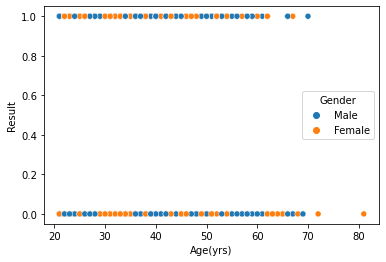

In [19]:
sns.scatterplot( x= 'Age(yrs)', y='Result',hue='Gender', data =diabetes_df)

checking for missing data

In [21]:
diabetes_df.isna().sum().max()

0

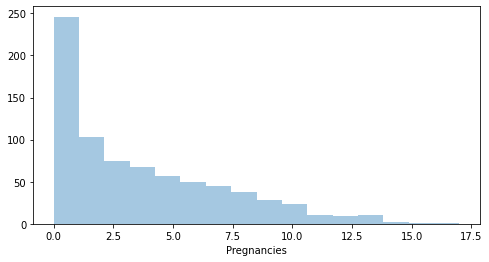

In [22]:
pregnancies = plt.subplots(figsize=(8, 4))
sns.distplot(diabetes_df.get("Pregnancies"), kde=False)
plt.show()

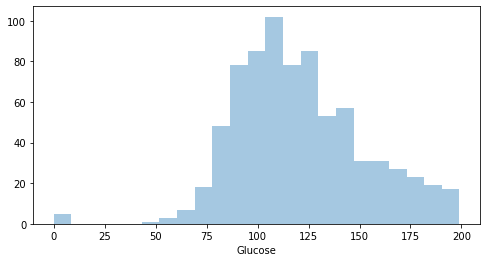

In [23]:
glucose = plt.subplots(figsize=(8, 4))
sns.distplot(diabetes_df.get("Glucose"), kde=False)
plt.show()

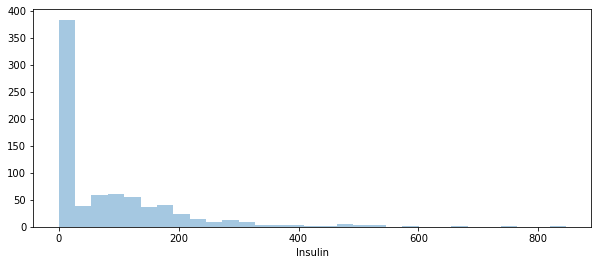

In [24]:
bp = plt.subplots(figsize=(10, 4))
sns.distplot(diabetes_df.get("Insulin"), kde=False)
plt.show()

In [25]:
X = diabetes_df.iloc[:, [1, 5]].values

In [26]:
y = diabetes_df.iloc[:, -1].values

In [27]:
# Splitting the dataset into the Training and Test set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [30]:
# Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scale = StandardScaler()

In [33]:
X_train = scale.fit_transform(X_train)

In [34]:
X_test = scale.transform(X_test)

KNeighbors Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)

In [37]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [38]:
# Predicting the Test set results

In [39]:
print(y_test )

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]


In [40]:
y_pred = classifier.predict(X_test)

In [41]:
print(y_pred )

[1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0]


In [42]:
# Introduce the Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [44]:
conf_matr = confusion_matrix(y_test, y_pred)

In [45]:
print(conf_matr)

[[96 11]
 [22 25]]


In [46]:
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.7703583061889251
0.7857142857142857


Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [49]:
tree = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [51]:
y_pred = tree.predict(X_test)

In [52]:
print(y_pred)

[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0
 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 0 0 0 0 0 1]


In [53]:
print(y_test)

[0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0
 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 1 1]


In [55]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.99185667752443
0.7012987012987013


Using Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [57]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [58]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [59]:
y_pred = rf.predict(X_test)

In [61]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.99185667752443
0.7467532467532467


Calculate mean absolute error to know performance metric

In [63]:
errors = abs(y_pred - y_test)

In [64]:
errors

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [65]:
print('Average error: ', round(np.mean(errors), 2))

Average error:  0.25
